# Connect to GDrive and set working directory
## !! Skip if you run in local !!
1. Add a shortcut for working directory('IDPCode') to your drive as depicted below:
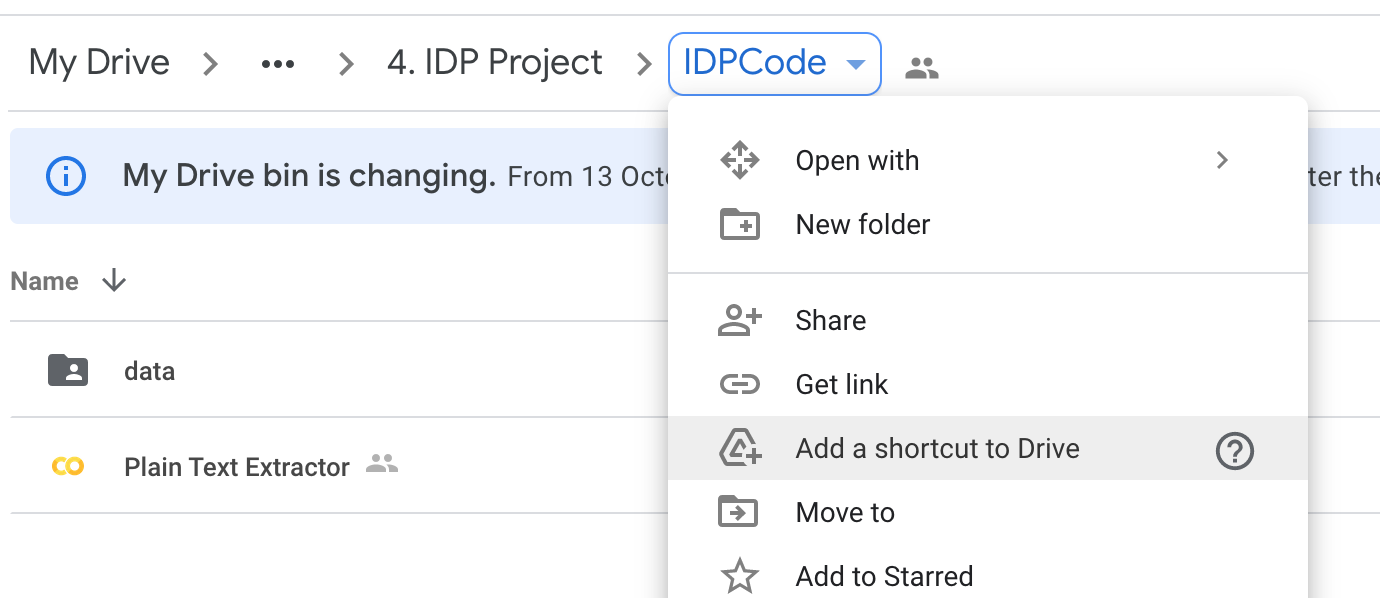
2. Run the command below to connect the GDrive:


In [ ]:
# https://github.com/njanakiev/folderstats
# https://janakiev.com/blog/python-filesystem-analysis/
# https://networkx.org/documentation/stable/
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/IDPCode/

In [ ]:
!pip install xlrd
!pip install spacy
!pip install gensim

# Start from here if you run in local !!

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# show execution time of cells
%load_ext autotime

# CHANGE PATH FOR THE DATASET FOLDER
DATA_DIRECTORY='/Users/farukcankaya/Google Drive/AllPapers'


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.95 ms


# 1. Data pre-processing

In [ ]:
# dt = Dataset Tika
dt = pd.read_excel('All_Papers_In_Plain_Text_TIKA_full.xlsx')

time: 49.4 s


**Consider only first 3 pages**

In [ ]:
dt['content'] = dt['page_1'].apply(str) + ' ' + dt['page_2'].apply(str) + ' ' + dt['page_3'].apply(str)

dt3 = pd.DataFrame(dt, columns=['file_path', 'total_page_count', 'content'])

time: 599 ms


In [ ]:
# Utility functions
def remove_dollar_sign(text):
  '''
  While drawing title count distribution, mathplotlib throws an error.
  Because some titles have dollar sign('$'). This method is used to clear the sign.
  '''
  
  text = str(text).replace('$', '\$')
  return text

import re
import string
def clean_text(text):
  '''
  Eliminates links, non alphanumerics, and punctuation.
  Returns lower case text.
  '''  
  
  # Convert to string
  text = str(text)
  # Remove links
  text = re.sub('(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-?=%.]+','', text)
  # Remove non-alphanumerics
  text = re.sub('\w*\d\w*', ' ', text)
  # Remove punctuation and lowercase
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text.lower())
  # Remove newline characters
  text = text.replace('\n', ' ')
  # Remove text in square brackets
  text = re.sub(r'\[.*?\]', '', text)
  # Remove words containing numbers
  text = re.sub(r'\w*\d\w*', '', text)
    
  return text

def lemmatizer(text):        
  sent = []
  doc = nlp(text)
  for word in doc:
    sent.append(word.lemma_)
    
  return " ".join(sent)

def remove_stopwords(text):
  clean_text = []
  for word in text.split(' '):
    if word not in stop_list and (len(word) > 2):
      clean_text.append(word)
  
  return ' '.join(clean_text)

def display_topics(model, feature_names, no_top_words, no_top_topics, topic_names=None):
  count = 0
  for ix, topic in enumerate(model.components_):
    if count == no_top_topics:
      break
    if not topic_names or not topic_names[ix]:
      print("\nTopic ", (ix + 1))
    else:
      print("\nTopic: '",topic_names[ix],"'")
    print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words-1:-1]]))
    count += 1

  

time: 1.4 ms


## 1.1. Clean text
- Lowercase
- Remove bracket, punctuation and numbers
- Remove links
- Remove newline characters
- Remove text in square brackets
- Remove words containing numbers ???

In [ ]:
dt3['clean_content'] = dt3['content'].apply(clean_text)

dt3.head(1)['clean_content']

0    s t a   j   t f   v   accounting horizons american accounting association vol     no    doi     pp   –   the effect of system characteristics  stage of adoption  and experience on institutional   explanations for erp systems choice   joseph c  ugrin   synopsis  existing studies have found a linkage between institutional factors and systems adoption  but the literature has overlooked an important question  when is the decision to implement a system influenced by institutional factors  in this paper  the author argues that decisions to adopt systems are not influenced equally by institutional factors  and examines how system characteristics moderate the effects of institutional factors on adoption decisions  specifically decisions to adopt enterprise resource plan  ning �hereafter  erp� systems  the results of the study reveal that institutional factors  such as mimicry of peers  compliance with industry norms  and coercion from powerful entities influence erp adoption decisions  th

time: 1min 29s


## 1.2. Remove non-ascii characters

In [ ]:
dt3['clean_content'] = dt3['clean_content'].str.encode('ascii', 'ignore').str.decode('ascii')

dt3.head(1)['clean_content']

0    s t a   j   t f   v   accounting horizons american accounting association vol     no    doi     pp      the effect of system characteristics  stage of adoption  and experience on institutional   explanations for erp systems choice   joseph c  ugrin   synopsis  existing studies have found a linkage between institutional factors and systems adoption  but the literature has overlooked an important question  when is the decision to implement a system influenced by institutional factors  in this paper  the author argues that decisions to adopt systems are not influenced equally by institutional factors  and examines how system characteristics moderate the effects of institutional factors on adoption decisions  specifically decisions to adopt enterprise resource plan  ning hereafter  erp systems  the results of the study reveal that institutional factors  such as mimicry of peers  compliance with industry norms  and coercion from powerful entities influence erp adoption decisions  the r

time: 505 ms


# Lemmatization (skip for now)

In [ ]:
!python -m spacy download en

import spacy
nlp = spacy.load('en')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/en_core_web_sm
-->
/Users/farukcankaya/FC/TUM/IDP/nlp-examples/.venv/lib/python3.8/site-packages/spacy/data/en
You can now load the model via spacy.load('en')
time: 5.41 s


In [ ]:
dt3["lemmatized_content"] =  dt3['clean_content'].apply(lemmatizer)

dt3.head(1)['lemmatized_content']

In [ ]:
dt3['lemmatized_content_clean'] = dt3['lemmatized_content'].str.replace('-PRON-', '')

dt3.head(1)['lemmatized_content_clean']

## 1.3. TODO: Find accounting related stop words

In [ ]:
# TODO:!!!!
# Find accounting related stop words
LIST_OF_ACCOUNTING_RELATED_STOP_WORDS = []

time: 359 µs


## 1.4. Remove stop words

In [ ]:
from gensim.parsing.preprocessing import STOPWORDS

stop_list = STOPWORDS.union(set(LIST_OF_ACCOUNTING_RELATED_STOP_WORDS))

# Remove stopwords
dt3['content_stop_words'] = dt3['clean_content'].apply(remove_stopwords)

time: 7.35 s


In [ ]:
dt3.head(1)

file_path  \
0  /Users/farukcankaya/Google Drive/AllPapers/8_AH/711_AH.pdf   

   total_page_count  \
0                25   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

time: 15.8 ms


## 1.5. Stemming
May lead to confusion, think about that again!!!

In [ ]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stem_text(text):
    word_list = []
    for word in text.split(' '):
        word_list.append(stemmer.stem(word))
    return ' '.join(word_list)
  
dt3['content_stemmed'] = dt3['content_stop_words'].apply(stem_text)

time: 5min 39s


Difference between `dt['content'].head(1)` and `dt['content_stemmed'].head(1)`
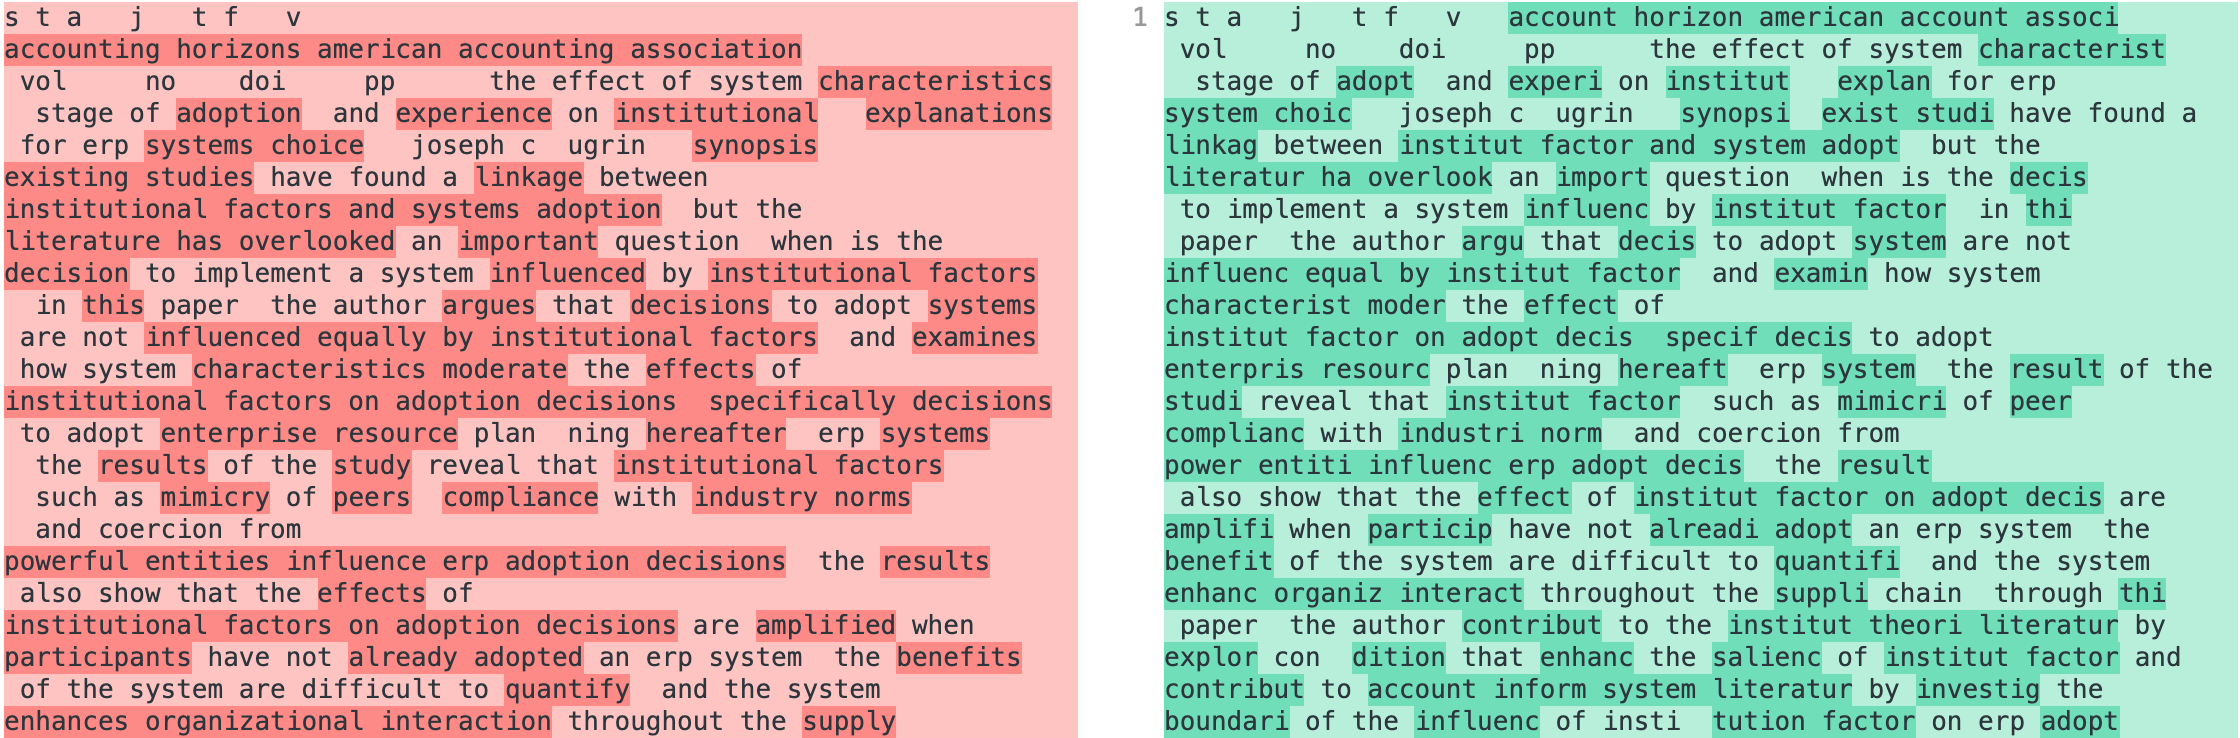

In [ ]:
dt3c = pd.DataFrame(dt3, columns=['file_path', 'total_page_count', 'content_stemmed'])

time: 862 ms


In [ ]:
dt3.to_excel('All_Papers_In_Plain_Text_TIKA_full_pre_processed_all_cols.xlsx')

time: 1min 5s


In [ ]:
dt3c.to_excel('All_Papers_In_Plain_Text_TIKA_full_pre_processed.xlsx')

time: 35.9 s


In [ ]:
dt3c.head(1)

file_path  \
0  /Users/farukcankaya/Google Drive/AllPapers/8_AH/711_AH.pdf   

   total_page_count  \
0                25   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

time: 7.83 ms


# 2. Topic Modeling

- TF-IDF
- Bag of Words

In [ ]:
NUM_OF_TOPICS = 8
NUM_OF_WORDS_IN_EACH_TOPIC = 10

time: 622 µs


## 2.1. Term Frequency–Inverse Document Frequency (TF-IDF) Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = stop_list,
                             ngram_range = (1,1))
doc_word = vectorizer.fit_transform(dt3c['content_stemmed'])

time: 13.1 s


In [ ]:
vectorizer.get_feature_names()[0:5]

['aa', 'aaa', 'aaaan', 'aaahorsubm', 'aaahq']

time: 138 ms


### 2.1.1 SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(NUM_OF_TOPICS)
docs_svd = svd.fit_transform(doc_word)

time: 1.79 s


**Show topics found by SVD**

In [ ]:
display_topics(svd, vectorizer.get_feature_names(), NUM_OF_WORDS_IN_EACH_TOPIC, NUM_OF_TOPICS)


Topic  1
account, audit, firm, auditor, manag, earn, report, inform, financi, research

Topic  2
audit, auditor, client, fee, intern, committe, qualiti, big, independ, fraud

Topic  3
nan, account, audit, univers, journal, research, critic, copyright, perspect, articl

Topic  4
earn, nan, firm, forecast, analyst, audit, auditor, investor, accrual, stock

Topic  5
tax, incom, rate, taxat, dividend, avoid, countri, corpor, capit, taxpay

Topic  6
earn, univers, forecast, analyst, account, tax, usa, journal, audit, australia

Topic  7
univers, usa, firm, australia, disclosur, manuscript, london, market, school, york

Topic  8
disclosur, analyst, forecast, environment, inform, report, tax, corpor, voluntari, csr
time: 259 ms


### 2.1.2  Non-negative Matrix Factorization ( NMF )

In [ ]:
from sklearn.decomposition import NMF

nmf = NMF(NUM_OF_TOPICS)
docs_nmf = nmf.fit_transform(doc_word)

time: 13.9 s


**Show topics found by NMF**

In [ ]:
display_topics(nmf, vectorizer.get_feature_names(), NUM_OF_WORDS_IN_EACH_TOPIC, NUM_OF_TOPICS)


Topic  1
firm, market, risk, price, stock, valu, cost, return, invest, perform

Topic  2
audit, auditor, client, fee, qualiti, intern, committe, big, independ, risk

Topic  3
nan, copyright, email, doi, listserv, print, matter, european, account, download

Topic  4
earn, forecast, analyst, manag, accrual, firm, announc, inform, investor, news

Topic  5
tax, incom, rate, taxat, avoid, countri, corpor, dividend, capit, firm

Topic  6
account, research, manag, social, practic, organis, paper, govern, process, develop

Topic  7
univers, usa, australia, journal, account, manuscript, school, london, articl, york

Topic  8
disclosur, report, inform, firm, ifr, environment, financi, compani, voluntari, investor
time: 211 ms


## 2.2. Bag of Words Vectorizer

In [ ]:
import gensim
from gensim import corpora, models
from gensim.utils import simple_preprocess

tokenized_docs = dt3c['content_stemmed'].apply(simple_preprocess)
dictionary = gensim.corpora.Dictionary(tokenized_docs)
dictionary.filter_extremes(no_below=NUM_OF_WORDS_IN_EACH_TOPIC, no_above=0.5, keep_n=100000)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

time: 41 s


### 2.2.1 LDA

In [ ]:
# Workers = 4 activates four cores of the CPU, 
lda = models.LdaMulticore(corpus=corpus, num_topics=NUM_OF_TOPICS, 
                          id2word=dictionary, passes=10,
                          workers = 4)

time: 2min 22s


In [ ]:
lda.print_topics()

[(0,
  '0.010*"social" + 0.007*"organis" + 0.006*"process" + 0.006*"environment" + 0.005*"corpor" + 0.005*"govern" + 0.005*"organ" + 0.005*"institut" + 0.005*"theori" + 0.004*"role"'),
 (1,
  '0.016*"cost" + 0.010*"risk" + 0.008*"decis" + 0.006*"product" + 0.006*"model" + 0.005*"contract" + 0.005*"incent" + 0.005*"organ" + 0.004*"budget" + 0.004*"invest"'),
 (2,
  '0.034*"tax" + 0.011*"bank" + 0.010*"govern" + 0.010*"rate" + 0.010*"countri" + 0.009*"corpor" + 0.009*"capit" + 0.009*"incom" + 0.006*"polici" + 0.006*"invest"'),
 (3,
  '0.049*"audit" + 0.020*"auditor" + 0.019*"intern" + 0.012*"standard" + 0.009*"compani" + 0.008*"committe" + 0.008*"qualiti" + 0.007*"disclosur" + 0.006*"board" + 0.006*"statement"'),
 (4,
  '0.036*"audit" + 0.033*"auditor" + 0.015*"client" + 0.012*"qualiti" + 0.012*"fee" + 0.009*"risk" + 0.008*"ceo" + 0.007*"big" + 0.007*"fraud" + 0.006*"earn"'),
 (5,
  '0.043*"le" + 0.035*"de" + 0.014*"que" + 0.013*"dan" + 0.009*"sur" + 0.008*"qui" + 0.008*"par" + 0.007*"au

time: 7.87 ms


#### LDA with sklearn

In [ ]:
# Show top 20 keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=NUM_OF_WORDS_IN_EACH_TOPIC):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords 

time: 692 µs


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=NUM_OF_TOPICS, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(doc_word)

time: 7min 33s


In [ ]:
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=NUM_OF_WORDS_IN_EACH_TOPIC) 

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,account,audit,firm,manag,auditor,research,earn,inform,report,financi
Topic 1,dd,jbc,llj,kiribati,bwa,nako,abatera,abana,kaubwain,iaon
Topic 2,ff,efg,eee,bii,lld,llee,tlu,voltim,cobra,tnarket
Topic 3,le,qui,une,auteur,pour,rsultat,sont,leur,vrificateur,linform
Topic 4,eebc,cocreat,erlich,renfr,cisabl,sylvan,smawil,themeanvari,austrad,tohav
Topic 5,efb,aef,cdb,daa,bben,bbbn,meadowhal,giannessi,smelli,languidli
Topic 6,andand,edd,kgg,iij,martinartin,timothyimothi,singhingh,davidavid,suzukiuzuki,doupnikoupnik
Topic 7,nan,mric,ffbc,jj,shc,iiiiv,geyr,poop,reveil,ozmen


time: 529 ms


## 2.3. Combine Topic Vectors with dataset

`docs_nmf`, `docs_svd`, and `lda` has percentages that represents how likely a paper belongs to a topic. The example table below shows that how likely first 5 document belongs to determined topics. For example, **Paper 4** belongs only to **Topic 3**.


In [ ]:
d = pd.DataFrame(data=docs_nmf, columns=['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8'])
d = d.head(5)
d['document'] = ['Paper 1', 'Paper 2', 'Paper 3', 'Paper 4', 'Paper 5']
cols = d.columns.tolist()
cols = cols[-1:] + cols[:-1]
d = d[cols]
d

,document,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8
0,Paper 1,0.015043,0.000329,0.000000,0.000000,0.0,0.036826,0.000000,0.009362
1,Paper 2,0.003975,0.004731,0.000000,0.000292,0.0,0.029847,0.027247,0.000000
2,Paper 3,0.021309,0.069020,0.000006,0.006648,0.0,0.000603,0.002460,0.003278
3,Paper 4,0.000000,0.000000,0.234724,0.000000,0.0,0.000000,0.000000,0.000000
4,Paper 5,0.000632,0.005717,0.000064,0.000000,0.0,0.025344,0.005010,0.012098


time: 31.9 ms


### 2.3.1 Calculate topic sum for each document
For example **Paper 1** belongs to Topic 1,2,6, and 8 and sum of all percentages is **0.06156** which is also shown on the first row in the table below. Another example is **Paper 4**. Since it only belongs to Topic 3, its topic sum is exactly equal to the percentage of Topic 3 which is **0.234724**.

In [ ]:
# Define column names for dataframe
column_names = ['file_path', 'total_page_count', 'content', 'content_stemmed', 
                't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 'sum']

# Create topic sum for each article
# Later remove all articles with sum 0
topic_sum = pd.DataFrame(np.sum(docs_nmf, axis = 1))

topic_sum.head(5)

,0
0,0.061559
1,0.066091
2,0.103325
3,0.234724
4,0.048865


time: 6.36 ms


### 2.3.3 Combine topic percentages and content into a same dataframe

In [ ]:
# Turn our docs_nmf array into a data frame
doc_topic_df = pd.DataFrame(data = docs_nmf)

# Merge all of our article metadata and name columns
doc_topic_df = pd.concat([dt3c[['file_path', 'total_page_count', 'content', 'content_stemmed']], 
                          doc_topic_df, topic_sum], axis = 1)
doc_topic_df.columns = column_names
doc_topic_df.head(5)

file_path  \
0  /Users/farukcankaya/Google Drive/AllPapers/8_AH/711_AH.pdf   
1  /Users/farukcankaya/Google Drive/AllPapers/8_AH/140_AH.pdf   
2  /Users/farukcankaya/Google Drive/AllPapers/8_AH/611_AH.pdf   
3   /Users/farukcankaya/Google Drive/AllPapers/8_AH/62_AH.pdf   
4  /Users/farukcankaya/Google Drive/AllPapers/8_AH/294_AH.pdf   

   total_page_count  \
0                25   
1                11   
2                17   
3                10   
4                13   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

time: 38.7 ms


In [ ]:
print(doc_topic_df.count())

file_path           15751
total_page_count    15751
content             15751
content_stemmed     15751
t1                  15751
t2                  15751
t3                  15751
t4                  15751
t5                  15751
t6                  15751
t7                  15751
t8                  15751
sum                 15751
dtype: int64
time: 9.24 ms


### 2.3.4 Remove papers with topic sum is 0

In [ ]:
# Remove articles with topic sum = 0, then drop sum column
doc_topic_df = doc_topic_df[doc_topic_df['sum'] != 0]
doc_topic_df.drop(columns = 'sum', inplace = True)

print(doc_topic_df.count())

file_path           15504
total_page_count    15504
content             15504
content_stemmed     15504
t1                  15504
t2                  15504
t3                  15504
t4                  15504
t5                  15504
t6                  15504
t7                  15504
t8                  15504
dtype: int64
time: 62.7 ms


In [ ]:
# Reset index then save
doc_topic_df.reset_index(drop = True, inplace = True)
doc_topic_df.to_excel('All_Papers_In_Plain_Text_TIKA_tfidf_nmf_8topics.xlsx', index = False)

time: 39.8 s


# 3. Similarity Measurement
- Cosine similarity
- 

In [ ]:
topic_names = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8']
topic_array = np.array(doc_topic_df[topic_names])
norms = np.linalg.norm(topic_array, axis = 1)

15504

time: 4.43 ms


In [ ]:
topic_names = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8']
topic_array = np.array(doc_topic_df[topic_names]) # = sqrt( t1^2 + t2^2 + t3^2 + t4^2 + t5^2 + t6^2 + t7^2 + t8^2 )
norms = np.linalg.norm(topic_array, axis = 1) # norms for 15504 papers

def compute_dists(top_vec, topic_array):
    '''
    Returns cosine distances for top_vec compared to every article
    '''
    dots = np.matmul(topic_array, top_vec)
    input_norm = np.linalg.norm(top_vec)
    co_dists = dots / (input_norm * norms)
    return co_dists
  
def produce_rec(top_vec, topic_array, doc_topic_df, rand = NUM_OF_WORDS_IN_EACH_TOPIC):
    '''
    Produces a recommendation based on cosine distance.
    rand controls magnitude of randomness.
    '''
    top_vec = top_vec + np.random.rand(NUM_OF_TOPICS,)/(np.linalg.norm(top_vec)) * rand
    co_dists = compute_dists(top_vec, topic_array)

    # top 5 docs
    indexes = co_dists.argsort()[-5:][::-1]
    return doc_topic_df.loc[indexes]
  
  

time: 5.85 ms


In [ ]:
topic_1 = 5
topic_2 = 5
topic_3 = 0
topic_4 = 0
topic_5 = 0
topic_6 = 5
topic_7 = 0
topic_8 = 0

top_vec = np.array([topic_1, topic_2, topic_3, topic_4, topic_5, topic_6, topic_7, topic_8])
rec = produce_rec(top_vec, topic_array, doc_topic_df)
rec

file_path                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

time: 29.2 ms


### Make prediction with LDA

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
# Lemmatization, remove pronouns.
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

time: 7.47 ms


In [ ]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# We will not assign dependency labels, and we will not lable named entities. And we need pos. 
nlp = spacy.load('en', disable=['parser', 'ner'])

# Define function to predict topic for a given new question.
def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization

    # Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))

    # Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    # Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)

    # Step 4: LDA Transform
    topic_probability_scores = lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    return topic, topic_probability_scores

time: 1.44 s


In [ ]:
# Predict the topic
mytext = ["earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn earn "]
topic, prob_scores = predict_topic(text = mytext)
print(topic)

['account', 'audit', 'firm', 'manag', 'auditor', 'research', 'earn', 'inform', 'report', 'financi']
time: 516 ms


In [ ]:
prob_scores[0]

array([0.56249999, 0.0625    , 0.0625    , 0.0625    , 0.0625    ,
       0.0625    , 0.0625    , 0.0625    ])

time: 2.32 ms


In [ ]:
top_vec = np.array(prob_scores[0])
rec = produce_rec(top_vec, topic_array, doc_topic_df)
rec[['file_path', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8']]

,file_path,t1,t2,t3,t4,t5,t6,t7,t8
3995,/Users/farukcankaya/Google Drive/AllPapers/14_EAR/73_EAR.pdf,0.010846,0.022523,0.000331,0.013944,0.009608,0.025149,0.000000,0.038363
8465,/Users/farukcankaya/Google Drive/AllPapers/10_JPT/263_JPT.pdf,0.004382,0.023558,0.000000,0.015975,0.008014,0.011549,0.003304,0.033529
1486,/Users/farukcankaya/Google Drive/AllPapers/13_JAPP/685_JAPP.pdf,0.021560,0.042767,0.010496,0.029477,0.012796,0.017333,0.004116,0.045733
6833,/Users/farukcankaya/Google Drive/AllPapers/15_BFA/73_BFA.pdf,0.025907,0.008512,0.000176,0.015865,0.010921,0.014005,0.002580,0.047609
12138,/Users/farukcankaya/Google Drive/AllPapers/19_MAJ/1285_MAJ.pdf,0.019874,0.017585,0.000000,0.005464,0.004173,0.020056,0.002319,0.033672


time: 55.1 ms


In [ ]:
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,account,audit,firm,manag,auditor,research,earn,inform,report,financi
Topic 1,dd,jbc,llj,kiribati,bwa,nako,abatera,abana,kaubwain,iaon
Topic 2,ff,efg,eee,bii,lld,llee,tlu,voltim,cobra,tnarket
Topic 3,le,qui,une,auteur,pour,rsultat,sont,leur,vrificateur,linform
Topic 4,eebc,cocreat,erlich,renfr,cisabl,sylvan,smawil,themeanvari,austrad,tohav
Topic 5,efb,aef,cdb,daa,bben,bbbn,meadowhal,giannessi,smelli,languidli
Topic 6,andand,edd,kgg,iij,martinartin,timothyimothi,singhingh,davidavid,suzukiuzuki,doupnikoupnik
Topic 7,nan,mric,ffbc,jj,shc,iiiiv,geyr,poop,reveil,ozmen


time: 30.8 ms
